In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('box.png', 0)          # query Image
img2 = cv2.imread('box_in_scene.png',0)  # target Image

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

good_matches = matches[:10]

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches     ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

dst = cv2.perspectiveTransform(pts,M)
dst += (w, 0)  # adding offset

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
               singlePointColor = None,
               matchesMask = matchesMask, # draw only inliers
               flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None,**draw_params)

# Draw bounding box in Red
img3 = cv2.polylines(img3, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

#cv2.imshow("result", img3)
#cv2.waitKey()
# or another option for display output
#plt.imshow(img3, 'result'), plt.show()

In [2]:
def my_show(img):
    plt.figure(figsize=(10,10),dpi=100)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

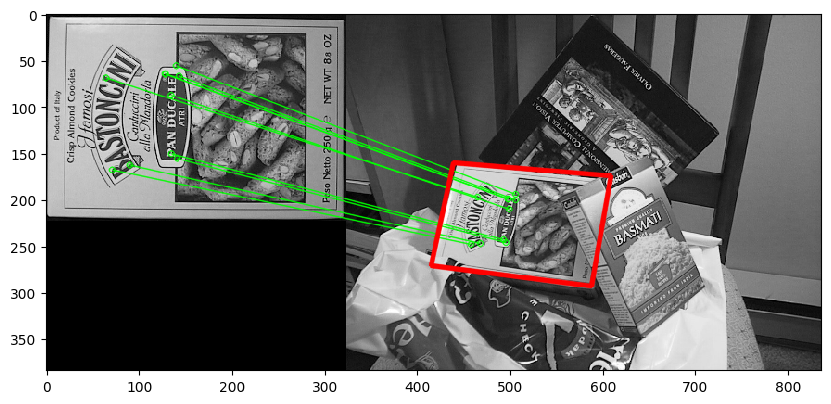

In [3]:
my_show(img3)